# Deep Nets Using TensorFlow Abstractions

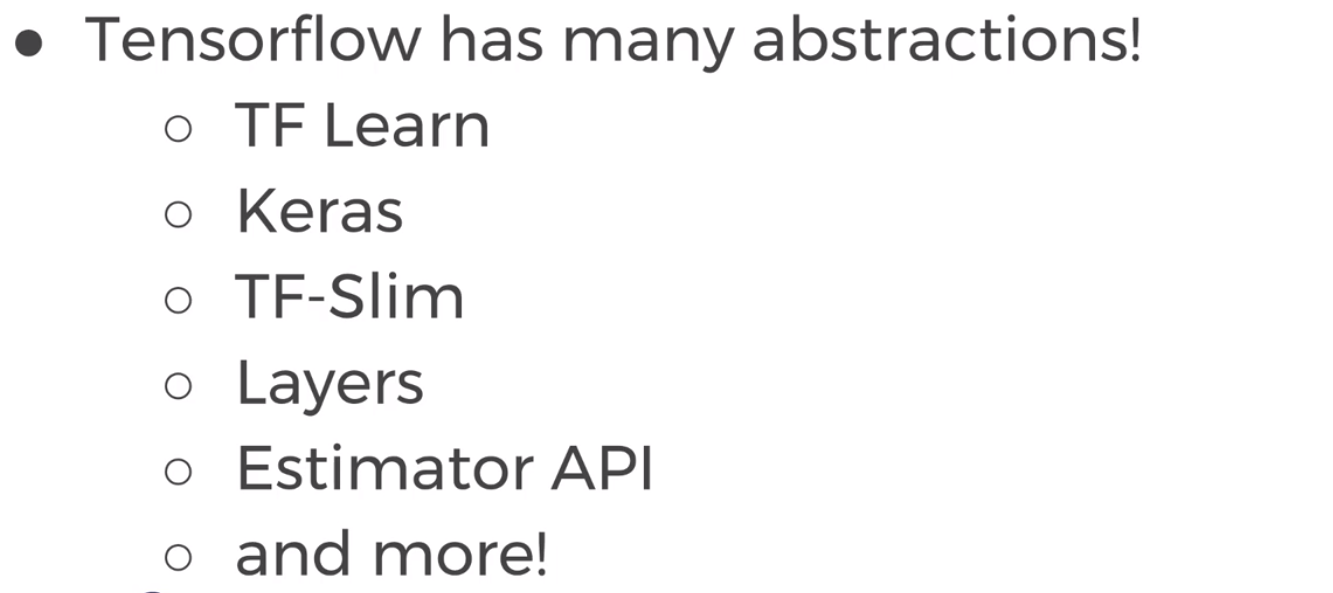

DNN for example are much easier with a TensorFlow abstraction. Just have to make sure layers are connected.

Abstractions today come and go. We will learn these ones. 

* Estimator API  
* Keras  
* Layers

In [3]:
from sklearn.datasets import load_wine

In [4]:
wine_data = load_wine()

In [5]:
type(wine_data)

sklearn.utils.Bunch

In [6]:
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
print(wine_data['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [8]:
feat_data = wine_data['data']

In [9]:
labels = wine_data['target']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feat_data,labels, 
                                                   test_size=0.3,random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)

In [15]:
scaled_X_test = scaler.transform(X_test)

In [16]:
y_train

array([1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1])

Not one-hot encoding

# TF Layers

In [105]:
import tensorflow as tf

In [106]:
import pandas as pd

In [107]:
onehot_y_train = pd.get_dummies(y_train).as_matrix()

In [108]:
onehot_y_test = pd.get_dummies(y_test).as_matrix()

In [109]:
num_feat = 13
num_hidden1 = 13
num_hidden2 = 13
num_outputs = 3

In [110]:
training_steps = 1000
learning_rate = 0.01

In [111]:
from tensorflow.contrib.layers import fully_connected

In [112]:
X = tf.placeholder(tf.float32, shape=[None,num_feat])
y_true = tf.placeholder(tf.float32, shape=[None,3])

In [113]:
actf = tf.nn.relu

In [114]:
# Layers
hidden1 = fully_connected(X,num_hidden1,activation_fn=actf)
hidden2 = fully_connected(hidden1, num_hidden2, activation_fn=actf)
output = fully_connected(hidden2, num_outputs)

In [115]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=y_true,logits=output)

In [116]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [117]:
train = optimizer.minimize(loss)

In [118]:
init = tf.global_variables_initializer()

In [119]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(training_steps):
        
        sess.run(train, feed_dict={X:scaled_X_train, y_true:onehot_y_train})
        
    logits = output.eval(feed_dict={X:scaled_X_test})
    
    preds = tf.argmax(logits,axis=1)
    
    results = preds.eval()

In [120]:
results

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
print(classification_report(y_test, results))

             precision    recall  f1-score   support

          0       0.59      1.00      0.75        19
          1       1.00      1.00      1.00        22
          2       0.00      0.00      0.00        13

avg / total       0.62      0.76      0.67        54



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
print(confusion_matrix(y_test, results))

[[19  0  0]
 [ 0 22  0]
 [13  0  0]]
